In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def normalize_edge(edge):
    return tuple(sorted(edge)) if isinstance(edge, tuple) else edge

In [19]:
def create_path_graph(n):
    G = nx.path_graph(n)
    mapping = {i: i + 1 for i in G.nodes()}
    G = nx.relabel_nodes(G, mapping)
    return G

def create_cycle_graph(n):
    G = nx.cycle_graph(n)
    mapping = {i: i + 1 for i in G.nodes()}
    G = nx.relabel_nodes(G, mapping)
    return G


In [21]:
def is_illegal_move(graph, move, chosen_color, coloring):
    move = normalize_edge(move)
    if isinstance(move, int):
        if move in coloring:
            return True
        for neighbor in graph.neighbors(move):
            if coloring.get(neighbor) == chosen_color:
                return True
        for edge in graph.edges(move):
            if coloring.get(normalize_edge(edge)) == chosen_color:
                return True
    else:
        v1, v2 = move
        if move in coloring:
            return True
        if coloring.get(v1) == chosen_color or coloring.get(v2) == chosen_color:
            return True
        for edge in list(graph.edges(v1)) + list(graph.edges(v2)):
            edge = normalize_edge(edge)
            if edge != move and coloring.get(edge) == chosen_color:
                return True
    return False

def valid_colors(available_colors, graph, node_or_edge, coloring):
    used_colors = set()
    if isinstance(node_or_edge, int):
        for neighbor in graph.neighbors(node_or_edge):
            if neighbor in coloring:
                used_colors.add(coloring[neighbor])
        for edge in graph.edges(node_or_edge):
            edge = normalize_edge(edge)
            if edge in coloring:
                used_colors.add(coloring[edge])
    else:
        node_or_edge = normalize_edge(node_or_edge)
        v1, v2 = node_or_edge
        if v1 in coloring:
            used_colors.add(coloring[v1])
        if v2 in coloring:
            used_colors.add(coloring[v2])
        for edge in list(graph.edges(v1)) + list(graph.edges(v2)):
            edge = normalize_edge(edge)
            if edge in coloring:
                used_colors.add(coloring[edge])
    return [color for color in available_colors if color not in used_colors]


In [23]:
%matplotlib inline

def draw_graph(graph, coloring):
    plt.figure(figsize=(8, 4))
    pos = nx.shell_layout(graph)

    color_mapping = {
        1: "yellow", 2: "red", 3: "blue", 4: "green", 5: "purple",
        6: "orange", 7: "cyan", 8: "magenta", 9: "brown"
    }

    node_colors = [color_mapping.get(coloring.get(node, 0), "gray") for node in graph.nodes]
    edge_colors = [color_mapping.get(coloring.get(normalize_edge(edge), 0), "black") for edge in graph.edges]

    nx.draw(graph, pos, with_labels=True, labels={node: node for node in graph.nodes},
            node_color=node_colors, edge_color=edge_colors, node_size=500, edgecolors="black")
    plt.show()


In [25]:
def player_A_turn(graph, colors, coloring):
    print("Current coloring:", coloring)
    print("Available moves:", [move for move in list(graph.nodes) + list(graph.edges) if normalize_edge(move) not in coloring])
    
    try:
        move = input("Enter vertex or edge to color (e.g., '1' or '(1,2)'): ").strip()
        if "," in move:
            move = tuple(map(int, move.strip("() ").split(",")))
        else:
            move = int(move)

        move = normalize_edge(move)

        if move in coloring:
            print("Invalid move! Already colored.")
            return player_A_turn(graph, colors, coloring)

        valid = valid_colors(colors, graph, move, coloring)
        if not valid:
            print("No valid colors left. Player B wins!")
            raise SystemExit

        chosen_color = int(input(f"Choose a color from {valid}: "))
        if is_illegal_move(graph, move, chosen_color, coloring):
            print("Illegal move! Player B wins!")
            raise SystemExit

        coloring[move] = chosen_color
        return True
    except ValueError:
        print("Invalid input.")
        return player_A_turn(graph, colors, coloring)

def player_B_turn(graph, colors, coloring):
    available_moves = [move for move in list(graph.nodes) + list(graph.edges) if normalize_edge(move) not in coloring]
    random.shuffle(available_moves)
    for move in available_moves:
        move = normalize_edge(move)
        valid = valid_colors(colors, graph, move, coloring)
        valid = [c for c in valid if not is_illegal_move(graph, move, c, coloring)]
        if valid:
            chosen_color = random.choice(valid)
            coloring[move] = chosen_color
            return f"Player B colored {move} with {chosen_color}"
            #draw_graph(graph, coloring)
    print("Player B cannot move. Player A wins!")
    return "Player B cannot move"


In [27]:
def play_game(n, k, graph_type):
    if graph_type == "path":
        graph = create_path_graph(n)
    elif graph_type == "cycle":
        graph = create_cycle_graph(n)
    else:
        print("Invalid graph type. Defaulting to path.")
        graph = create_path_graph(n)

    colors = list(range(1, k + 1))
    coloring = {}

    print(f"Starting Total Coloring Game on {graph_type.capitalize()} Graph")
    print("Vertices:", list(graph.nodes))
    print("Edges:", list(graph.edges))
    draw_graph(graph, {})

    while len(coloring) < len(graph.nodes) + len(graph.edges):
        if not player_A_turn(graph, colors, coloring):
            print("Player B wins!")
            return
        if len(coloring) == len(graph.nodes) + len(graph.edges):
            draw_graph(graph, coloring)
            print("Player A wins!")
            return

        b_message = player_B_turn(graph, colors, coloring)
        draw_graph(graph, coloring)
        print(b_message)

        if len(coloring) == len(graph.nodes) + len(graph.edges):
            print("Player A wins!")
            return
        if "cannot move" in b_message:
            print("Player A wins!")
            return

    print("Game Over. Final coloring:", coloring)


Choose graph type (path/cycle):  cycle
Enter number of vertices:  3
Enter number of colors:  5


Starting Total Coloring Game on Cycle Graph
Vertices: [1, 2, 3]
Edges: [(1, 2), (1, 3), (2, 3)]


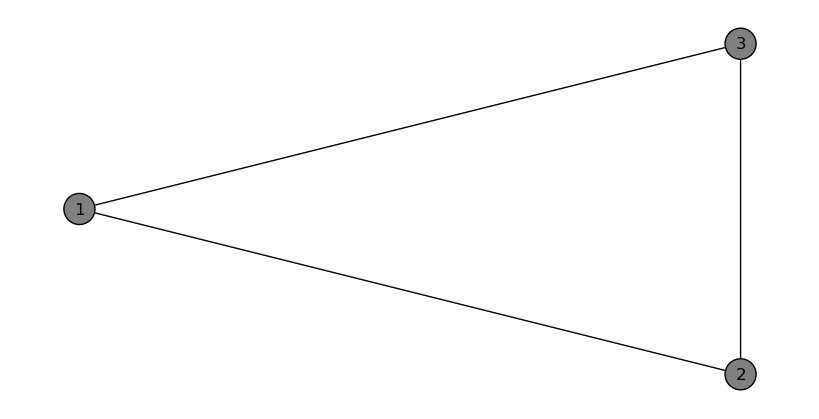

Current coloring: {}
Available moves: [1, 2, 3, (1, 2), (1, 3), (2, 3)]


Enter vertex or edge to color (e.g., '1' or '(1,2)'):  1
Choose a color from [1, 2, 3, 4, 5]:  1


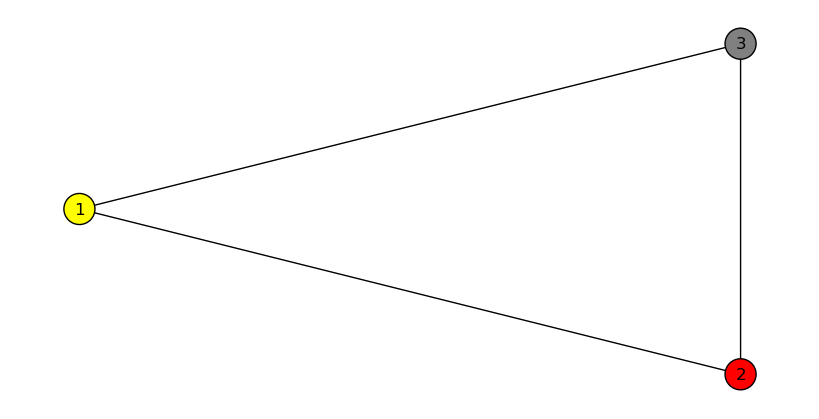

Player B colored 2 with 2
Current coloring: {1: 1, 2: 2}
Available moves: [3, (1, 2), (1, 3), (2, 3)]


Enter vertex or edge to color (e.g., '1' or '(1,2)'):  (2,3)
Choose a color from [1, 3, 4, 5]:  1


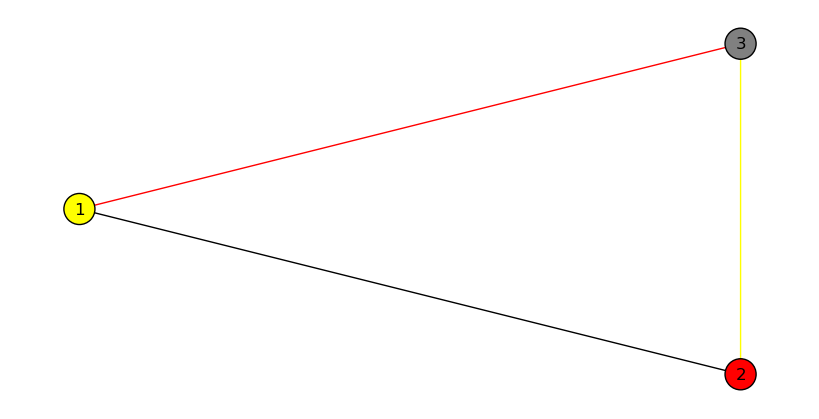

Player B colored (1, 3) with 2
Current coloring: {1: 1, 2: 2, (2, 3): 1, (1, 3): 2}
Available moves: [3, (1, 2)]


Enter vertex or edge to color (e.g., '1' or '(1,2)'):  3
Choose a color from [3, 4, 5]:  3


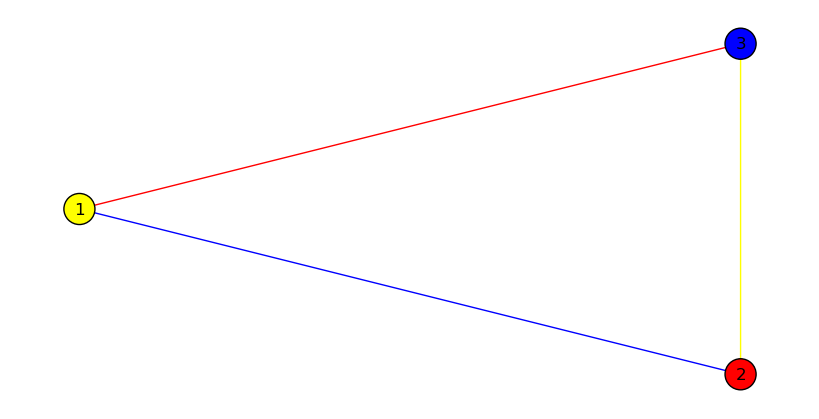

Player B colored (1, 2) with 3
Player A wins!


In [31]:
graph_type = input("Choose graph type (path/cycle): ").strip().lower()
n = int(input("Enter number of vertices: "))
k = int(input("Enter number of colors: "))
play_game(n, k, graph_type)
